In [81]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [82]:
# Data Preprocessing
df = pd.read_csv("Carseats.csv")
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df.drop(["a"], axis=1, inplace=True) # axis =0 means along the rows, 1 means along the columns
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


3(A) Train Test Split

In [83]:
le = LabelEncoder()
label = le.fit_transform(df['ShelveLoc'])
df.drop("ShelveLoc", axis=1, inplace=True)
df["ShelveLoc"] = label
label = le.fit_transform(df['Urban'])
df.drop("Urban", axis=1, inplace=True)
df["Urban"] = label
label = le.fit_transform(df['US'])
df.drop("US", axis=1, inplace=True)
df["US"] = label
df.head()

data = df.to_numpy()
dataY = data[:,0]
dataX = data[:,1:]

X_train, X_test, Y_train, Y_test = train_test_split(dataX, dataY,test_size=0.2, random_state=42)

Q3(b)

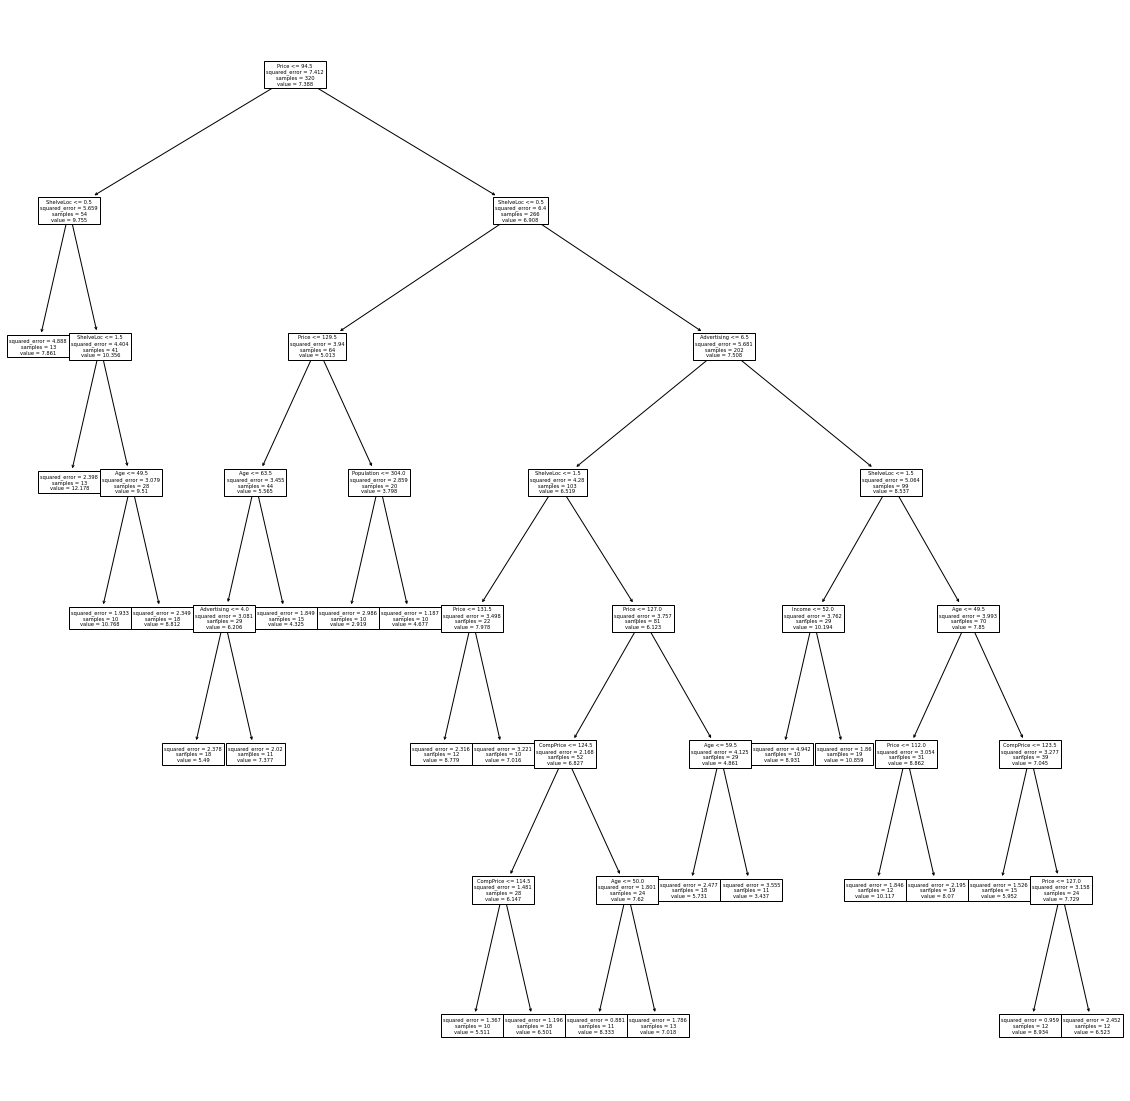

In [84]:
clf = tree.DecisionTreeRegressor(min_samples_leaf=10)
clf = clf.fit(X_train, Y_train)
fig = plt.figure(figsize=(20,20))
tree.plot_tree(clf,feature_names=df.columns[1:], class_names=df.columns[0]);
Y_pred = clf.predict(X_test)


In [85]:
test_error = mean_squared_error(Y_pred, Y_test)
print("Test Error is ", test_error)

Test Error is  4.453745223943031


Q3 (c)

Test Error : 4.444181778153789


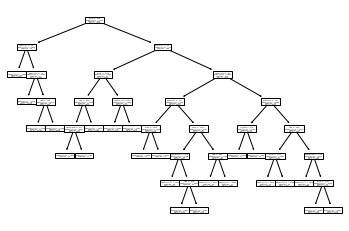

In [86]:
clf = tree.DecisionTreeRegressor(min_samples_leaf=10)
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
omodel = None
alpha = 0
tmin = 1e8
for c in ccp_alphas:
  clf = tree.DecisionTreeRegressor(min_samples_leaf=10, ccp_alpha=c)
  model = clf.fit(X_train, Y_train)
  if (mean_squared_error(model.predict(X_test), Y_test)<tmin):
    tmin = mean_squared_error(model.predict(X_test), Y_test)
    alpha = c
    omodel = model


tree.plot_tree(omodel,feature_names=df.columns[1:], class_names=df.columns[0]);
print("Test Error :",tmin)

Q3 (d)


In [87]:
model = RandomForestRegressor(max_samples = 0.25, max_features = 4)
model = model.fit(X_train, Y_train)
Y_pred2 = model.predict(X_test)
test_error2 = mean_squared_error(Y_pred2, Y_test)
test_error2

5.132222608999994